In [1]:
import numpy as np
import random
import os
import glob

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats

In [2]:
def read_file(directory):
    list_dir = os.listdir(directory)
    list_dir = sorted(list_dir)
    
    train_acc, train_loss, val_acc, val_loss = [],[],[],[]
    with open(directory+'/'+list_dir[0],'r') as f:
        for line in f:
            train_acc.append(float(line.rstrip('\n')))
    with open(directory+'/'+list_dir[1],'r') as f:
        for line in f:
            train_loss.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[2],'r') as f:
        for line in f:
            val_acc.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[3],'r') as f:
        for line in f:
            val_loss.append(float(line.rstrip('\n')))  

    return train_acc,train_loss,val_acc,val_loss

In [3]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    return m, m-h, m+h

def return_highest(input_list,interval):
    tmp_mean, tmp_diff, index = 0, 0, 0
    for i in range(len(input_list)-interval):
        mean, high, low = mean_confidence_interval(input_list[i:interval+i])
        if mean > tmp_mean:
            tmp_mean = mean
            tmp_diff = high-mean
            index = i

    return tmp_mean,-tmp_diff, index, interval

In [4]:
_5151_training_acc, _5151_training_loss, _5151_val_acc, _5151_val_loss = read_file('5151/')
_5155_training_acc, _5155_training_loss, _5155_val_acc, _5155_val_loss = read_file('5155/')
_5551_training_acc, _5551_training_loss, _5551_val_acc, _5551_val_loss = read_file('5551/')
_5555_training_acc, _5555_training_loss, _5555_val_acc, _5555_val_loss = read_file('5555/')

_20151_training_acc, _20151_training_loss, _20151_val_acc, _20151_val_loss = read_file('20151/')
_20155_training_acc, _20155_training_loss, _20155_val_acc, _20155_val_loss = read_file('20155/')
_20551_training_acc, _20551_training_loss, _20551_val_acc, _20551_val_loss = read_file('20551/')
_20555_training_acc, _20555_training_loss, _20555_val_acc, _20555_val_loss = read_file('20555/')

_60151_training_acc, _60151_training_loss, _60151_val_acc, _60151_val_loss = read_file('60151/')
_60155_training_acc, _60155_training_loss, _60155_val_acc, _60155_val_loss = read_file('60155/')
_60551_training_acc, _60551_training_loss, _60551_val_acc, _60551_val_loss = read_file('60551/')
_60555_training_acc, _60555_training_loss, _60555_val_acc, _60555_val_loss = read_file('60555/')

In [5]:
def draw_figure(training_acc,training_loss,val_acc,val_loss,le_name,title,save_name,save_op=False,alpha=1):
    
    flatui = ["#001871","#e48d2c","#c90000","#43bcff", "#138d90", "#000000"]
    len_train = int(len(training_acc[0])*alpha)
    len_test = int(len(val_acc[0])*alpha)

    training = np.arange(0, len_train, 10)
    val = np.arange(0, len_train, int(len_train/len_test))

    fig = plt.figure(figsize=(25,16))
    #fig.suptitle(title,fontsize=24)

#     ax1=plt.subplot(2, 2, 1)
#     ax1.set_color_cycle(sns.color_palette(flatui))
#     plt.xticks(fontsize=18)
#     plt.yticks(fontsize=18)
#     for i in range(len(le_name)):
#         plt.plot(training, training_loss[i][0:len_train:10])
#     plt.xlabel('iteration', fontsize=18)
#     plt.ylabel('Training Loss', fontsize=18)
#     plt.gca().legend(le_name, fontsize=18)

#     ax2=plt.subplot(2, 2, 2)
#     ax2.set_color_cycle(sns.color_palette(flatui))
#     plt.xticks(fontsize=18)
#     plt.yticks(fontsize=18)
#     for i in range(len(le_name)):
#         plt.plot(val, val_loss[i][0:len_test])
#     plt.xlabel('iteration', fontsize=18)
#     plt.ylabel('Testing Loss', fontsize=18)
#     plt.gca().legend(le_name, fontsize=18)

#     ax3=plt.subplot(2, 2, 3)
#     ax3.set_color_cycle(sns.color_palette(flatui))
#     plt.xticks(fontsize=18)
#     plt.yticks(fontsize=18)
#     for i in range(len(le_name)):
#         plt.plot(training, training_acc[i][0:len_train:10])
#     plt.xlabel('iteration', fontsize=18)
#     plt.ylabel('Training Accuracy', fontsize=18)
#     plt.gca().legend(le_name, fontsize=18)

    ax4=plt.subplot(1, 1, 1)
    ax4.set_color_cycle(sns.color_palette(flatui))
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    for i in range(len(le_name)):
        plt.plot(val, val_acc[i][0:len_test],linewidth=3)
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('Testing Accuracy', fontsize=18)
    plt.gca().legend(le_name, fontsize=18,prop={'size': 24})
    #,prop={'size': 24}
    if save_op:
        fig.savefig(save_name,bbox_inches='tight')
    plt.show()

/Users/yaoyuan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


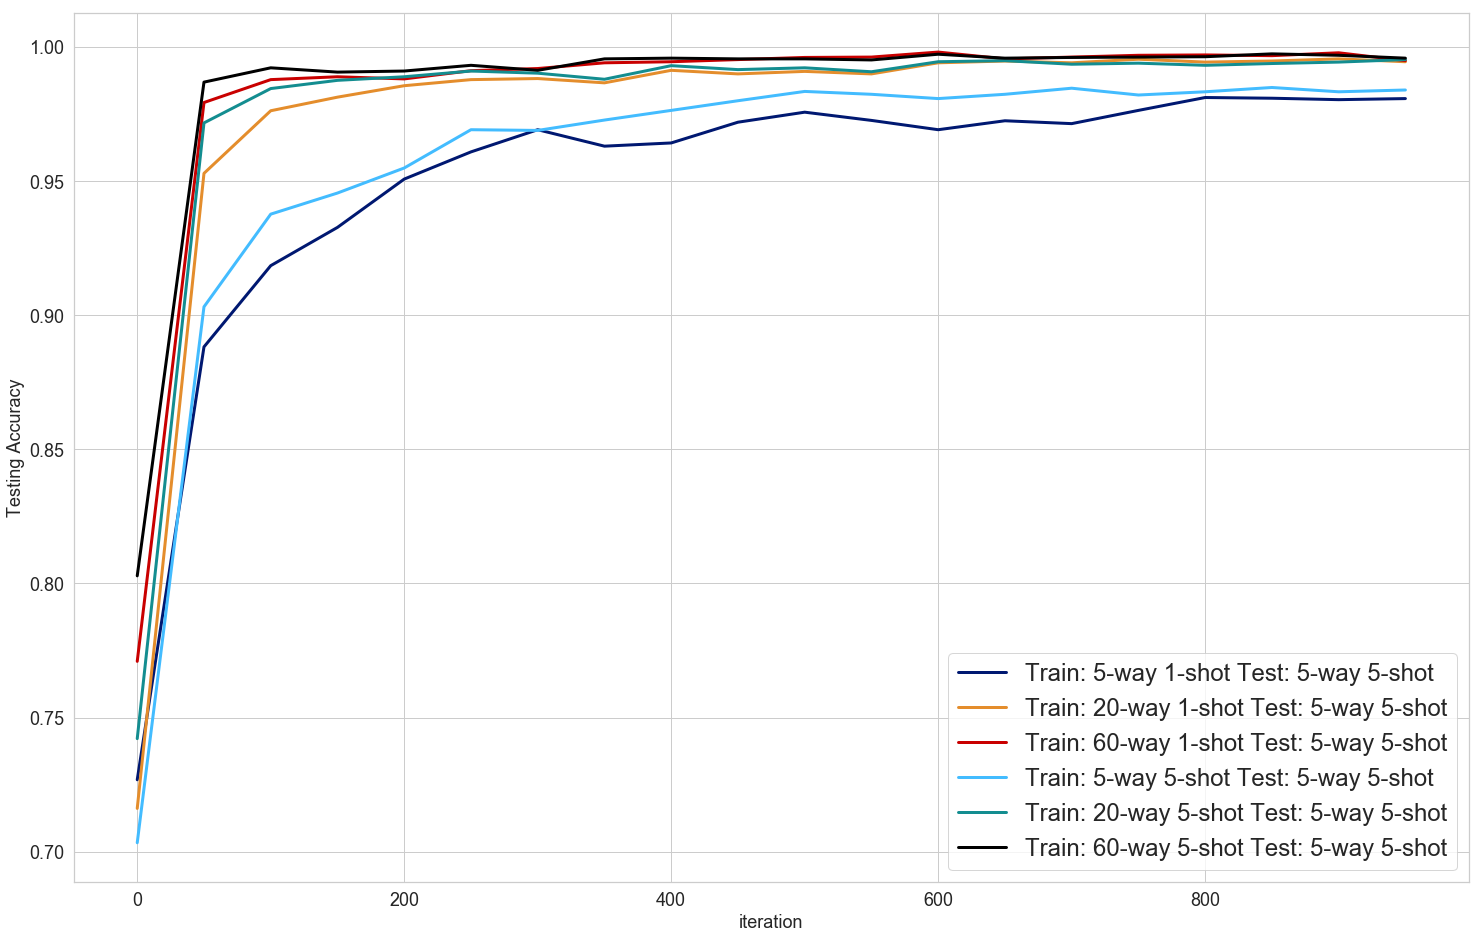

In [6]:
training_loss = [_5155_training_loss,_20155_training_loss,_60155_training_loss,
                 _5555_training_loss,_20555_training_loss,_60555_training_loss]
training_acc = [_5155_training_acc,_20155_training_acc,_60155_training_acc,
                _5555_training_acc,_20555_training_acc,_60555_training_acc]
val_loss = [_5155_val_loss,_20155_val_loss,_60155_val_loss,
            _5555_val_loss,_20555_val_loss,_60555_val_loss]
val_acc = [_5155_val_acc,_20155_val_acc,_60155_val_acc,
           _5555_val_acc,_20555_val_acc,_60555_val_acc]
le_name = ('Train: 5-way 1-shot Test: 5-way 5-shot','Train: 20-way 1-shot Test: 5-way 5-shot','Train: 60-way 1-shot Test: 5-way 5-shot',
           'Train: 5-way 5-shot Test: 5-way 5-shot','Train: 20-way 5-shot Test: 5-way 5-shot','Train: 60-way 5-shot Test: 5-way 5-shot')
title = 'Training and Validation results on Omniglot dataset'
save_name = 'test-5way-5shot.jpg'
sns.set(style="whitegrid")
draw_figure(training_acc,training_loss,val_acc,val_loss,le_name,title,save_name,save_op=True,alpha=0.2)

In [8]:
val_acc = [_5151_val_acc,_20151_val_acc,_60151_val_acc,
           _5551_val_acc,_20551_val_acc,_60551_val_acc]
for i in range(len(val_acc)):
    print(str(le_name[i]),': ', max(val_acc[i]))

Train: 5-way 1-shot Test: 5-way 5-shot :  0.9782666718959808
Train: 20-way 1-shot Test: 5-way 5-shot :  0.9914666694402695
Train: 60-way 1-shot Test: 5-way 5-shot :  0.99480000436306
Train: 5-way 5-shot Test: 5-way 5-shot :  0.9744000047445297
Train: 20-way 5-shot Test: 5-way 5-shot :  0.9888000041246414
Train: 60-way 5-shot Test: 5-way 5-shot :  0.991333339214325
